In [1]:
##importing necessary libraries for building the project

##basic libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
%matplotlib inline

#import library for linear rigression model
import statsmodels.formula.api as smf


#import library for splitting the data into training and testing data
from sklearn.model_selection import train_test_split

#import library for Decision Tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

#import library for Random Forest model
from sklearn.ensemble import RandomForestRegressor

#import library for Ada boost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

#import library for Gradient Boost regressor
from sklearn.ensemble import GradientBoostingRegressor

#import library for Bagging Regressor Model
from sklearn.ensemble import BaggingRegressor
from scipy.stats import uniform, randint


#import library for avoid warinings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("day.csv")
data=data.drop('dteday',axis=1)
data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


# VIF Calculation

In [4]:
data.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [5]:
r_instant = smf.ols("instant ~ season+yr+mnth+holiday+weekday+workingday+weathersit+temp+atemp+hum+windspeed+casual+registered", data=data).fit().rsquared
v_instant = 1/(1-r_instant)

r_season = smf.ols("season ~ instant+yr+mnth+holiday+weekday+workingday+weathersit+temp+atemp+hum+windspeed+casual+registered", data=data).fit().rsquared
v_season = 1/(1-r_season)

r_yr = smf.ols("yr ~ instant+season+mnth+holiday+weekday+workingday+weathersit+temp+atemp+hum+windspeed+casual+registered", data=data).fit().rsquared
v_yr = 1/(1-r_yr)

r_mnth = smf.ols("mnth ~ instant+season+yr+holiday+weekday+workingday+weathersit+temp+atemp+hum+windspeed+casual+registered", data=data).fit().rsquared
v_mnth = 1/(1-r_mnth)

r_holiday = smf.ols("holiday ~ instant+season+yr+mnth+weekday+workingday+weathersit+temp+atemp+hum+windspeed+casual+registered", data=data).fit().rsquared
v_holiday = 1/(1-r_holiday)

r_weekday = smf.ols("weekday ~ instant+season+yr+mnth+holiday+workingday+weathersit+temp+atemp+hum+windspeed+casual+registered", data=data).fit().rsquared
v_weekday = 1/(1-r_weekday)

r_workingday = smf.ols("workingday ~ instant+season+yr+mnth+holiday+weekday+weathersit+temp+atemp+hum+windspeed+casual+registered", data=data).fit().rsquared
v_workingday = 1/(1-r_workingday)

r_weathersit = smf.ols("weathersit ~ instant+season+yr+mnth+holiday+weekday+workingday+temp+atemp+hum+windspeed+casual+registered", data=data).fit().rsquared
v_weathersit = 1/(1-r_weathersit)

r_temp = smf.ols("temp ~ instant+season+yr+mnth+holiday+weekday+workingday+weathersit+atemp+hum+windspeed+casual+registered", data=data).fit().rsquared
v_temp = 1/(1-r_temp)

r_atemp = smf.ols("atemp ~ instant+season+yr+mnth+holiday+weekday+workingday+weathersit+temp+hum+windspeed+casual+registered", data=data).fit().rsquared
v_atemp = 1/(1-r_atemp)

r_hum = smf.ols("hum ~ instant+season+yr+mnth+holiday+weekday+workingday+weathersit+temp+atemp+windspeed+casual+registered", data=data).fit().rsquared
v_hum = 1/(1-r_hum)

r_windspeed = smf.ols("windspeed ~ instant+season+yr+mnth+holiday+weekday+workingday+weathersit+temp+atemp+hum+casual+registered", data=data).fit().rsquared
v_windspeed = 1/(1-r_windspeed)

r_casual = smf.ols("casual ~ instant+season+yr+mnth+holiday+weekday+workingday+weathersit+temp+atemp+hum+windspeed+registered", data=data).fit().rsquared
v_casual = 1/(1-r_casual)

r_registered = smf.ols("registered ~ instant+season+yr+mnth+holiday+weekday+workingday+weathersit+temp+atemp+hum+windspeed+casual", data=data).fit().rsquared
v_registered = 1/(1-r_registered)

In [6]:
VIF= {"Variables":['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual','registered'],
      'VIF':[v_instant, v_season, v_yr, v_mnth, v_holiday, v_weekday, v_workingday, v_weathersit, v_temp, v_atemp, v_hum, v_windspeed,v_casual,v_registered]}
VIF_df = pd.DataFrame(VIF)
VIF_df

,Variables,VIF
0,instant,583.476733
1,season,4.021709
2,yr,444.648281
3,mnth,148.303103
4,holiday,1.130612
5,weekday,1.445149
6,workingday,1.105904
7,weathersit,1.905252
8,temp,64.068377
9,atemp,65.119118


In [7]:
VIF_df[VIF_df.VIF>10]

,Variables,VIF
0,instant,583.476733
2,yr,444.648281
3,mnth,148.303103
8,temp,64.068377
9,atemp,65.119118


In [8]:
len(VIF_df[VIF_df.VIF>10])

5

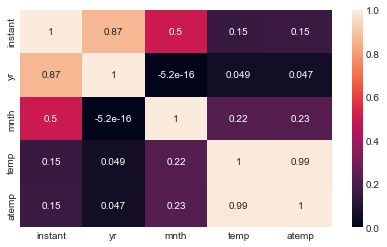

In [9]:
plt.figure(figsize=(7,4))
sns.heatmap(data[["instant","yr","mnth","temp","atemp"]].corr(),annot=True,color="white")
plt.show()

In [10]:
final_Data=data.copy()

In [11]:
final_Data=final_Data.drop(columns=['yr','atemp'],axis=1)
final_Data

,instant,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,2,1,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,3,1,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,1,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,1,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,12,0,5,1,2,10.420847,65.2917,23.458911,247,1867,2114
726,727,1,12,0,6,0,2,10.386653,59.0000,10.416557,644,2451,3095
727,728,1,12,0,0,0,2,10.386653,75.2917,8.333661,159,1182,1341
728,729,1,12,0,1,1,1,10.489153,48.3333,23.500518,364,1432,1796


In [12]:
model0 = smf.ols("cnt ~ instant+season+yr+mnth+holiday+weekday+workingday+weathersit+temp+atemp+hum+windspeed+casual+registered", data=data).fit()


In [13]:
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.521e+29
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        20:31:43   Log-Likelihood:                 16530.
No. Observations:                 730   AIC:                        -3.303e+04
Df Residuals:                     715   BIC:                        -3.296e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.663e-13   1.04e-11      0.093      0.926   -1.95e-11    2.14e-11
instant    -2.309e-14   1.52e-13     -0.152      0.879   -3.21e-13    2.75e-13
season      4.121e-13    2.4e-12      0.172      0.864   -4.29e-12    5.12e-12
yr          4.547e-12   5.59e-11      0.081      0.935   -1.05e-10    1.14e-10
mnth        6.253e-13   4.68e-12      0.134      0.894   -8.57e-12    9.82e-12
holiday    -8.811e-13   8.43e-12     -0.104      0.917   -1.74e-11    1.57e-11
weekday    -1.421e-14   7.97e-13     -0.018      0.986   -1.58e-12    1.55e-12
workingday -4.476e-13   3.02e-12     -0.148      0.882   -6.37e-12    5.47e-12
weathersit -3.411e-13   3.36e-12     -0.101      0.919   -6.94e-12    6.26e-12
temp        3.695e-13   1.41e-12      0.261      0.794   -2.41e-12    3.15e-12
atemp       -4.05e-13   1.31e-12     -0.308      0.758   -2.98e-12    2.17e-12
hum         1.776e-14    1.3e-13      0.136      0.892   -2.38e-13    2.74e-13
windspeed  -3.908e-14   2.86e-13     -0.137      0.891      -6e-13    5.22e-13
casual         1.0000   2.83e-15   3.53e+14      0.000       1.000       1.000
registered     1.0000   1.79e-15   5.58e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       73.013   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.120
Skew:                           0.047   Prob(JB):                     1.57e-05
Kurtosis:                       2.152   Cond. No.                     1.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model0.params

Intercept     9.663381e-13
instant      -2.309264e-14
season        4.121148e-13
yr            4.547474e-12
mnth          6.252776e-13
holiday      -8.810730e-13
weekday      -1.421085e-14
workingday   -4.476419e-13
weathersit   -3.410605e-13
temp          3.694822e-13
atemp        -4.050094e-13
hum           1.776357e-14
windspeed    -3.907985e-14
casual        1.000000e+00
registered    1.000000e+00
dtype: float64

In [15]:
model0.predict()

array([ 985.,  801., 1349., 1562., 1600., 1606., 1510.,  959.,  822.,
       1321., 1263., 1162., 1406., 1421., 1248., 1204., 1000.,  683.,
       1650., 1927., 1543.,  981.,  986., 1416., 1985.,  506.,  431.,
       1167., 1098., 1096., 1501., 1360., 1526., 1550., 1708., 1005.,
       1623., 1712., 1530., 1605., 1538., 1746., 1472., 1589., 1913.,
       1815., 2115., 2475., 2927., 1635., 1812., 1107., 1450., 1917.,
       1807., 1461., 1969., 2402., 1446., 1851., 2134., 1685., 1944.,
       2077.,  605., 1872., 2133., 1891.,  623., 1977., 2132., 2417.,
       2046., 2056., 2192., 2744., 3239., 3117., 2471., 2077., 2703.,
       2121., 1865., 2210., 2496., 1693., 2028., 2425., 1536., 1685.,
       2227., 2252., 3249., 3115., 1795., 2808., 3141., 1471., 2455.,
       2895., 3348., 2034., 2162., 3267., 3126.,  795., 3744., 3429.,
       3204., 3944., 4189., 1683., 4036., 4191., 4073., 4400., 3872.,
       4058., 4595., 5312., 3351., 4401., 4451., 2633., 4433., 4608.,
       4714., 4333.,

# Calculating Z-score to eliminate the outliers in the given dataset

In [16]:
# Load the data into a Pandas DataFrame
final_csv= pd.read_csv("day.csv")

# Calculate the Z-scores for each column
z_scores = np.abs(final_csv - final_csv.mean()) / final_csv.std()

# Define a threshold value (e.g. 3 standard deviations)
threshold = 3

# Identify the rows that have any column with a Z-score greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove the outliers
final_csv = final_csv[~outliers]

# Save the cleaned data to a new file
final_csv.to_csv('cleaned_data.csv', index=False)

In [17]:
Project_Data=pd.read_csv("cleaned_data.csv")

In [18]:
Project_Data.shape

(699, 16)

In [19]:
Project_Data=Project_Data.drop(columns=['yr','atemp','dteday'])
Project_Data

,instant,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,2,1,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,3,1,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,1,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,1,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,726,1,12,0,5,1,2,10.420847,65.2917,23.458911,247,1867,2114
695,727,1,12,0,6,0,2,10.386653,59.0000,10.416557,644,2451,3095
696,728,1,12,0,0,0,2,10.386653,75.2917,8.333661,159,1182,1341
697,729,1,12,0,1,1,1,10.489153,48.3333,23.500518,364,1432,1796


In [20]:
df_norm = (Project_Data-Project_Data.min())/(Project_Data.max()-Project_Data.min())
df_norm = pd.concat((df_norm, data.cnt), 1)


# Splitting tha data into X and Y

In [21]:
X=df_norm.iloc[:,0:-1]
Y=df_norm.iloc[:,-1]

In [22]:
X = X.replace(np.nan, 0)

# 4.2 - Apply Decision Tree Model

In [23]:
X

,instant,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,0.000000,0.0,0.0,0.0,0.166667,1.0,0.5,0.355170,0.760765,0.345236,0.115317,0.091539,0.112856
1,0.001372,0.0,0.0,0.0,0.333333,1.0,0.5,0.379232,0.603235,0.565533,0.045216,0.093849,0.091293
2,0.002743,0.0,0.0,0.0,0.500000,1.0,0.0,0.171000,0.231732,0.564958,0.041360,0.174560,0.155514
3,0.004115,0.0,0.0,0.0,0.666667,1.0,0.0,0.175530,0.451582,0.344861,0.037154,0.207046,0.180476
4,0.005487,0.0,0.0,0.0,0.833333,1.0,0.0,0.209120,0.231278,0.411391,0.028041,0.216286,0.184929
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
726,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
727,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
728,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
Y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,shuffle=True, random_state=10)

In [26]:
DTmodel = DecisionTreeRegressor(max_depth=3,splitter='best',random_state=10,max_features=None)
DTmodel.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [27]:
Y_pred=DTmodel.predict(X_test)

In [28]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1224529.588718566


In [29]:
# Calculate the Rsquare value of the prediction
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

R-squared: 0.657587220188881


In [30]:
# Calculate the mean Absolute Error of the prediction
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 808.5731184950163


In [31]:
# Calculate root mean square error
RMSE=np.sqrt(mse)
print("RMSE:", RMSE)

RMSE: 1106.584650498355


In [32]:
MAPE=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
print('MAPE:',MAPE)

MAPE: 1.4318494006413063
